# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9aba8f52f775591a856db4c786f81bb8&units=imperial&q=


In [4]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | lucapa
Processing Record 2 of Set 1 | porto novo
Processing Record 3 of Set 1 | aksu
Processing Record 4 of Set 1 | champasak
Processing Record 5 of Set 1 | dongzhen
Processing Record 6 of Set 1 | rikitea
City not found. Skipping...
Processing Record 7 of Set 1 | linhares
Processing Record 8 of Set 1 | richards bay
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kamenka
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | riyadh
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | muros
Processing Record 23 of Set 1 | airai
Processing Record 24 of Set 1 | antalaha
Processing Record

Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | marijampole
City not found. Skipping...
Processing Record 41 of Set 4 | gamba
Processing Record 42 of Set 4 | sarangani
Processing Record 43 of Set 4 | chissamba
City not found. Skipping...
Processing Record 44 of Set 4 | kampene
Processing Record 45 of Set 4 | malacacheta
Processing Record 46 of Set 4 | mazagao
Processing Record 47 of Set 4 | hakkari
Processing Record 48 of Set 4 | kanata
Processing Record 49 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | kutulik
Processing Record 2 of Set 5 | yinchuan
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | tibati
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | egvekinot
City not found. Skipping...
Processing Record 9 of Set 5 | kaabong
Processing Record 10 of Set 5 | shumikha
Processing Record 11 of 

Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | bima
Processing Record 32 of Set 8 | kismayo
Processing Record 33 of Set 8 | puerto leguizamo
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | mlonggo
Processing Record 37 of Set 8 | locri
City not found. Skipping...
Processing Record 38 of Set 8 | beba
Processing Record 39 of Set 8 | anshun
City not found. Skipping...
Processing Record 40 of Set 8 | leh
Processing Record 41 of Set 8 | tatawin
Processing Record 42 of Set 8 | bonoua
Processing Record 43 of Set 8 | anantapur
Processing Record 44 of Set 8 | quilali
Processing Record 45 of Set 8 | faya
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | gopalpur
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | xinyu
Processing Record 1 of Set 9 | santa fe
Processing Record 2 of Set 9 | puerto madero
City not found. Skipping...
City not found. Skipping..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [6]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lucapa,100,AO,1586474474,73,-8.42,20.74,67.71,3.13
1,porto novo,75,PT,1586474467,100,41.15,-8.61,61.00,6.93
2,aksu,99,CN,1586474475,24,41.12,80.26,56.71,8.03
3,champasak,75,LA,1586474475,76,14.75,106.00,76.17,1.14
4,dongzhen,90,CN,1586474475,77,22.38,110.94,69.85,2.15
5,rikitea,100,PF,1586474476,68,-23.12,-134.97,76.60,8.63
6,linhares,92,BR,1586474338,88,-19.39,-40.07,71.58,5.26
7,richards bay,75,US,1586474476,65,46.84,-95.91,39.20,25.28
8,bethel,1,US,1586474477,45,41.37,-73.41,50.00,17.22
9,isangel,20,VU,1586473993,74,-19.55,169.27,80.60,15.17


In [7]:
weather_dataframe.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

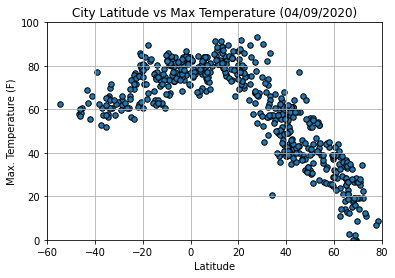

In [8]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature (04/09/2020)")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

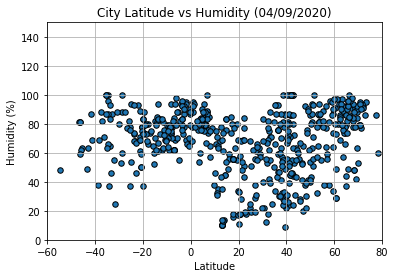

In [9]:
#Create a Scatter Plot for Lattitude vs Humidity of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity (04/09/2020)")

plt.ylim(0,150)
plt.xlim(-60, 80)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS HUM.png")

#### Latitude vs. Cloudiness Plot

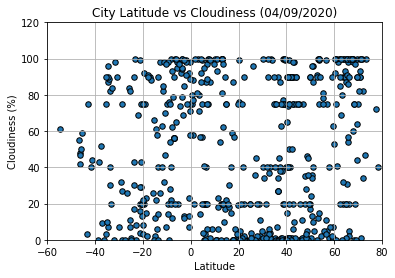

In [10]:
#Create a Scatter Plot for Lattitude vs Cloudiness of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness (04/09/2020)")

plt.ylim(0,120)
plt.xlim(-60, 80)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS cloudiness.png")

#### Latitude vs. Wind Speed Plot

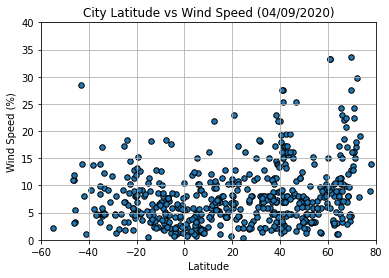

In [11]:
#Create a Scatter Plot for Lattitude vs Wind Speed of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed (04/09/2020)")

plt.ylim(0,40)
plt.xlim(-60, 80)

plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS Wind Speed.png")

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_dataframe.loc[weather_dataframe['Lat'] > 0, :]
southern_hemisphere_df = weather_dataframe.loc[weather_dataframe['Lat'] < 0, :]
southern_hemisphere_df
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,porto novo,75,PT,1586474467,100,41.15,-8.61,61.00,6.93
2,aksu,99,CN,1586474475,24,41.12,80.26,56.71,8.03
3,champasak,75,LA,1586474475,76,14.75,106.00,76.17,1.14
4,dongzhen,90,CN,1586474475,77,22.38,110.94,69.85,2.15
7,richards bay,75,US,1586474476,65,46.84,-95.91,39.20,25.28
...,...,...,...,...,...,...,...,...,...
544,poronaysk,36,RU,1586474641,89,49.22,143.12,33.69,5.97
545,kemptville,75,CA,1586474641,60,45.02,-75.64,43.00,9.17
546,nador,40,MA,1586474641,93,35.17,-2.93,60.80,3.71
548,doha,1,QA,1586474458,51,25.29,51.53,84.20,16.11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9020261462786849


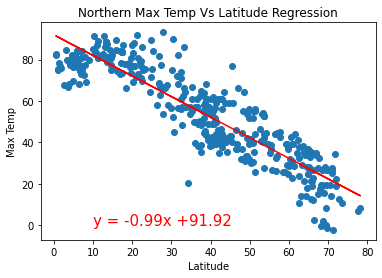

In [14]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Northern Hemisphere.
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'NorthernMaxTempVsLatitudeReg.png', (10,0)) 


In [15]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6778614116831634


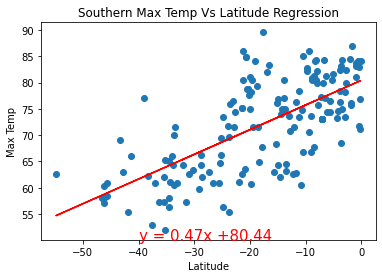

In [16]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24195120358939504


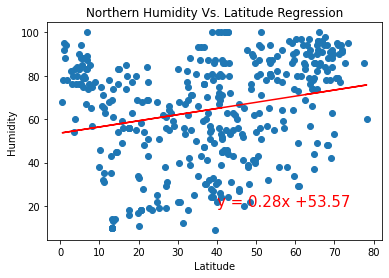

In [17]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'NorthernHumidityVsLatitudeReg.png', (40,20)) 

In [18]:
# This linear regression shows that the humidity percent generally decreases as the latitude goes further away from the equator, but the r-squared is not very high for this making it difficult to determine if the data accurately portrays this or not. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18474512836991627


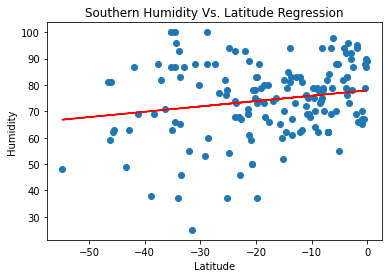

In [19]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'SouthernHumidityVsLatitudeReg.png', (-50,20)) 

In [20]:
# This linear regression suggests that the humidity percent increases as we get closer to the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15083488143820434


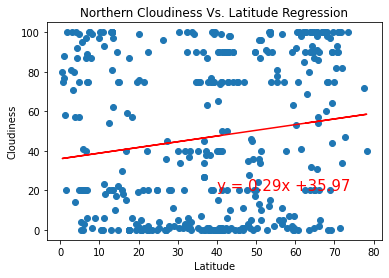

In [21]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'NorthernCloudinessVsLatitudeReg.png', (40,20)) 

In [22]:
# This linear regression suggests that the cloudiness percent increases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24420261865197504


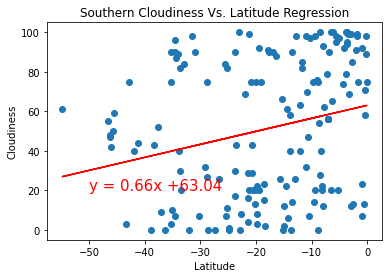

In [23]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'SouthernCloudinessVsLatitudeReg.png', (-50,20)) 

In [24]:
# This linear regression suggests that the cloudiness percent decreases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.31041582193464756


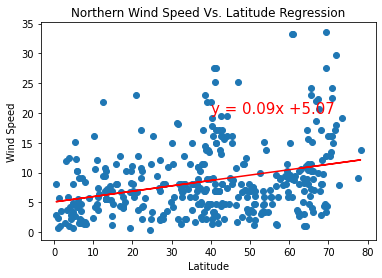

In [25]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'NorthernWindSpeedVsLatitudeReg.png', (40,20)) 

In [26]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24917671963778584


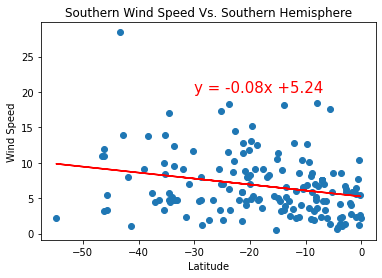

In [27]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'SouthernWindSpeedVsLatitudeReg.png', (-30,20)) 

In [28]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong. 